In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from pprint import pprint
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

# Data Setup

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/food_news_articles/df_data.csv', sep=',')

In [ ]:
df.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,corrupt government,economic impoverishment,unable to sow,cattle plague,air attack,gangs of bandits,inadequate rainfall,rinderpest,rising inflation,fews_ipc
0,0,0.523720,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.462010,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
colsAgriculture = ['bad harvests', 'drought', 'floods', 'lack of rains', 'pests', 'cyclone', 'locusts', 'natural disaster', 'farmland', 'unable to sow', 'cattle plague',
                   'inadequate rainfall', 'rinderpest']
colsClimateChange = ['carbon', 'catastrophe', 'climate change', 'climatic hazards', 'environmental degradation', 'greenhouse gases', 'land degradation',
                     'weather extremes']
colsFoodPrice = ['price of food', 'rise', 'rising food prices', 'price rise', 'rising inflation']
colsSocEco = ['cycle of poverty', 'economic crisis', 'food assistance', 'food crisis', 'food insecurity', 'humanitarian situation', 
              'infant mortality', 'malnourished', 'acute hunger', 'ecological crisis', 'hunger crises', 'makeshift camps', 'reduced imports',
              'foreign aid', 'international intervention', 'without international aid', 'economic impoverishment']
colsMigration = ['displaced', 'flee', 'migration', 'refugees', 'brain drain', 'asylum seekers']
colsPolitical = ['authoritarian', 'conflict', 'corruption', 'coup', "d'etat", 'dictators', 'jihadist groups', 'land grab', 'land reform', 'lack of authority',
                 'mismanagement', 'overthrow', 'repression', 'secession', 'siege', 'terrorism', 'terrorist', 'the offensive', 'aid appeal', 'blockade',
                 'convoys', 'human rights abuses', 'humanitarian disaster', 'military junta', 'civil strife', 'militia groups', 'apathy', 'bombing campaign',
                 'call for donations', 'foreign troops', 'oppressive regimes', 'totalitarian', 'military dictatorship', 'stolen food aid', 'corrupt government',
                 'air attack', 'burning houses', 'lack of roads', 'wreaked havoc', ]
colsCrime = ['clans', 'looting', 'pirates', 'mayhem', 'warlord', 'gangs of bandits', 'slave trade']
colsHealth = ['epidemics', 'cholera outbreak', 'gastrointestinal', 'water availability', 'dehydrated']

colsUnsure = ['dysfunction', 'tragedy', 'alarming level']

Unsure words left out for now, will discuss these with Yongsu on Fri

In [ ]:
df['Agriculture'] = df[colsAgriculture].sum(axis=1)
df['ClimateChange'] = df[colsClimateChange].sum(axis=1)
df['FoodPrice'] = df[colsFoodPrice].sum(axis=1)
df['SocioEconomic'] = df[colsSocEco].sum(axis=1)
df['Migration']= df[colsMigration].sum(axis=1)
df['Political'] = df[colsPolitical].sum(axis=1)
df['Health'] = df[colsHealth].sum(axis=1)
df['Crime'] = df[colsCrime].sum(axis=1)

In [ ]:
df.head(10)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,rising inflation,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
0,0,0.523720,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.462010,15.0,...,0.0,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,0.0,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,0.0,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,0.0,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,0.0,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0
5,5,1.377125,Burkina Faso,2017-02-01,-1.144652,2377.727451,-58.862745,2250.622549,-101.275899,9.0,...,0.0,1.0,9.0,30.0,7.0,6.0,9.0,31.0,0.0,0.0
6,6,27.475518,Guinea,2017-02-01,10.729071,4313.959770,-40.782687,5103.910201,127.207714,9.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,12.0,0.0,0.0
7,7,1.013336,Mali,2017-02-01,-0.208743,2188.009454,-36.587535,11152.840861,-477.693934,32.0,...,0.0,1.0,53.0,60.0,55.0,62.0,104.0,530.0,2.0,14.0
8,8,0.308902,Niger,2017-02-01,-0.006661,1732.456863,7.250163,17028.255882,482.156781,4.0,...,0.0,2.0,1.0,1.0,2.0,0.0,1.0,37.0,0.0,1.0
9,9,0.452823,Senegal,2017-02-01,-0.003582,2154.160494,-31.318750,5438.573045,-225.218793,6.0,...,0.0,1.0,9.0,16.0,21.0,16.0,35.0,99.0,0.0,4.0


In [ ]:
newDf = df.transpose()
colsToDrop = colsAgriculture + colsClimateChange + colsFoodPrice + colsSocEco + colsPolitical + colsCrime + colsHealth + colsUnsure + colsMigration
newDf = newDf.drop(index = colsToDrop)
newDf = newDf.transpose()
newDf.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,pasture,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
0,0,0.52372,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,...,1055.933333,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,3380.15015,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,1031.317227,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,587.654902,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,1099.759259,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0


In [ ]:
def getScore(ipc):
  if(ipc <= 2):
    return 0
  else:
    return 1

newDf['highIPC'] = newDf.apply(lambda row : getScore(row['fews_ipc']), axis = 1)
newDf.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime,highIPC
0,0,0.52372,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,...,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0,0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0,0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0,0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0,0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0,0


**CODE ABOVE IS NOW SORTED AND READY TO BE FED INTO LOGIT MODEL** 

In [ ]:
len(newDf)

228

Split based on parameters outlayed in Doc

In [ ]:

trainingDF = newDf.loc[(df['year_month'] <= '2020-01-01')]
trainingDF.head(10)


validationDF = newDf.loc[(df['year_month'] >= '2020-02-01')]
validationDF.head(10)
#2020


,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime,highIPC
183,183,1.268522,Burkina Faso,2020-02-01,-1.253255,2414.852941,-21.737255,2154.791176,-197.107271,62.0,...,2.0,32.0,36.0,3.0,12.0,46.0,41.0,0.0,0.0,0
184,184,7.443837,Guinea,2020-02-01,-9.30261,4286.507184,-68.235273,4049.671695,-927.030792,112.0,...,1.0,2.0,10.0,12.0,2.0,12.0,13.0,1.0,1.0,0
185,185,0.908549,Mali,2020-02-01,-0.313529,2215.032563,-9.564426,12184.991597,554.456801,83.0,...,2.0,12.0,52.0,13.0,40.0,57.0,184.0,3.0,2.0,0
186,186,0.305474,Niger,2020-02-01,-0.010089,1769.782353,44.575654,16740.287255,194.188154,50.0,...,3.0,0.0,6.0,1.0,2.0,1.0,33.0,1.0,0.0,1
187,187,0.460946,Senegal,2020-02-01,0.004542,2206.798354,21.31911,5096.849794,-566.942044,9.0,...,1.0,8.0,20.0,4.0,2.0,7.0,23.0,2.0,1.0,0
188,188,13.627778,Burkina Faso,2020-03-01,1.84904,2551.888235,20.005556,4727.970588,358.83414,90.0,...,2.0,7.0,4.0,1.0,3.0,5.0,12.0,1.0,3.0,0
189,189,48.70815,Guinea,2020-03-01,7.944148,4601.538793,-14.986231,7805.688937,270.7189,83.0,...,1.0,4.0,10.0,20.0,3.0,12.0,28.0,2.0,2.0,0
190,190,7.09351,Mali,2020-03-01,1.975979,2300.579832,4.58736,12239.490546,-202.616028,110.0,...,2.0,18.0,26.0,13.0,26.0,69.0,122.0,4.0,10.0,0
191,191,0.822734,Niger,2020-03-01,-0.054678,1721.666667,78.181699,18150.081373,-259.661111,56.0,...,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1
192,192,0.178547,Senegal,2020-03-01,0.004987,2117.911523,8.629112,4694.875514,-532.534722,5.0,...,1.0,3.0,7.0,5.0,16.0,5.0,15.0,4.0,2.0,0


In [ ]:
len(trainingDF)

183

In [ ]:
len(validationDF)

45

Split before/after Dec 2019 and Jan 2020
178/228 = 78%
50/228 = 21.9%


Split before/after Jan 2020 and Feb 2020
183/228 = 80.3%
45/228 = 19.7%


# Just Traditional Predictors

Set up Logit, 

In [ ]:
X_train_trad = trainingDF.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country", "Agriculture", "ClimateChange", "FoodPrice", "SocioEconomic", "Migration", "Political", "Health", "Crime"], axis = 1)

y_train = trainingDF["highIPC"]

X_test_trad = validationDF.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country", "Agriculture", "ClimateChange", "FoodPrice", "SocioEconomic", "Migration", "Political", "Health", "Crime"], axis = 1)	

y_test = validationDF["highIPC"]

In [ ]:
count_low_ipc =  len(trainingDF[trainingDF['highIPC']==0])
count_high_ipc = len(trainingDF[trainingDF['highIPC']==1])
pct_of_low_ipc = count_low_ipc/(count_low_ipc+count_high_ipc)
print("percentage of low IPC is", pct_of_low_ipc*100)

pct_of_high_ipc = count_high_ipc/(count_high_ipc+count_low_ipc)
print("percentage of high IPC is", pct_of_high_ipc*100)


percentage of low IPC is 78.68852459016394
percentage of high IPC is 21.311475409836063


In [ ]:
X_train_trad

,rain_mean,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,acled_fatalities,fpi,area,cropland,population,ruggedness,pasture
0,0.52372,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,0.4,4.048891,22.70596,0.29435,22801367.716652,0.236,1055.933333
1,3.816683,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,0.666667,2.784014,20.216301,0.283333,12223768.263397,0.74,3380.15015
2,0.464684,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,3.375,3.478236,106.823821,0.287111,23333132.737746,0.147,1031.317227
3,0.079214,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,1.25,3.33178,100.422092,0.272401,23931107.900141,0.178,587.654902
4,0.463942,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,0.0,3.205143,16.484244,0.257143,16205227.748318,0.244,1099.759259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.506217,-0.010029,2640.521569,65.691503,2096.110784,-125.154167,84.0,2.690476,3.958532,22.70596,0.29435,22801367.716652,0.236,1055.933333
179,3.00314,-0.707941,4571.533046,-20.38573,3640.335489,-796.802042,166.0,0.084337,2.813455,20.216301,0.283333,12223768.263397,0.74,3380.15015
180,0.518713,-0.009605,2373.079832,6.964723,11623.112395,284.159839,88.0,2.420455,3.544934,106.823821,0.287111,23333132.737746,0.147,1031.317227
181,0.079098,-0.002168,1881.67451,63.948366,15649.602941,62.504587,51.0,3.960784,3.310707,100.422092,0.272401,23931107.900141,0.178,587.654902


Train model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_trad = LogisticRegression()
logreg_trad.fit(X_train_trad,y_train)
y_pred_trad = logreg_trad.predict(X_test_trad)

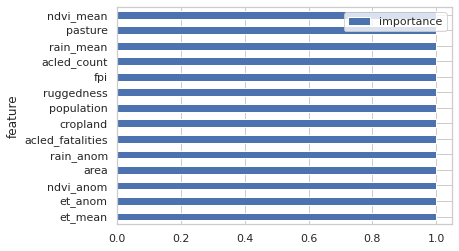

In [ ]:
import math
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14 = logreg_trad.coef_[0]
feature_names = ['rain_mean',	'rain_anom',	'ndvi_mean',	'ndvi_anom',	'et_mean',	'et_anom',	'acled_count',	'acled_fatalities',
                 'fpi',	'area',	'cropland',	'population',	'ruggedness',	'pasture']

feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [ ]:
w

array([-1.80322952e-05,  1.21251592e-06, -6.22476676e-04,  1.68746554e-05,
        1.40169221e-04,  1.27361598e-04, -1.19506143e-06,  2.86666406e-07,
       -2.20613380e-07,  3.31054548e-06, -2.51921128e-08, -3.77118588e-08,
       -9.31475468e-08, -4.91391859e-04])

An increase of the Agrigculture feature by one unit increases the odds of being High IPC class by a factor of just over 1.0 when all other features remain the same.

Confusion matrix

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_trad)
cnf_matrix

array([[24,  2],
       [ 9, 10]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

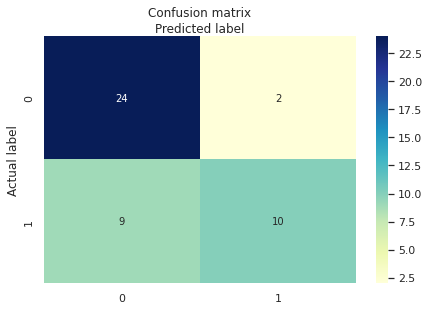

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Model seems to almost never predict high food insecurity based off of text features alone

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_trad))
print("Precision:",metrics.precision_score(y_test, y_pred_trad))
print("Recall:",metrics.recall_score(y_test, y_pred_trad))

Accuracy: 0.7555555555555555
Precision: 0.8333333333333334
Recall: 0.5263157894736842


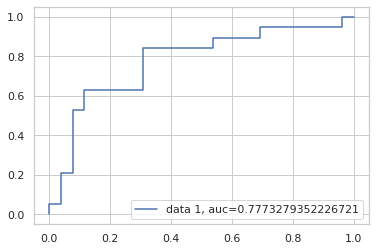

In [ ]:
y_pred_proba = logreg_trad.predict_proba(X_test_trad)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression Traditonal + Text Features

In [ ]:
X_train_full = trainingDF.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country"], axis = 1)

y_train = trainingDF["highIPC"]

X_test_full = validationDF.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country"], axis = 1)	

y_test = validationDF["highIPC"]

In [ ]:
X_train_full

,rain_mean,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,acled_fatalities,fpi,area,...,ruggedness,pasture,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
0,0.52372,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,0.4,4.048891,22.70596,...,0.236,1055.933333,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0
1,3.816683,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,0.666667,2.784014,20.216301,...,0.74,3380.15015,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0
2,0.464684,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,3.375,3.478236,106.823821,...,0.147,1031.317227,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0
3,0.079214,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,1.25,3.33178,100.422092,...,0.178,587.654902,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0
4,0.463942,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,0.0,3.205143,16.484244,...,0.244,1099.759259,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.506217,-0.010029,2640.521569,65.691503,2096.110784,-125.154167,84.0,2.690476,3.958532,22.70596,...,0.236,1055.933333,9.0,20.0,5.0,2.0,27.0,30.0,0.0,1.0
179,3.00314,-0.707941,4571.533046,-20.38573,3640.335489,-796.802042,166.0,0.084337,2.813455,20.216301,...,0.74,3380.15015,0.0,7.0,6.0,1.0,7.0,42.0,1.0,7.0
180,0.518713,-0.009605,2373.079832,6.964723,11623.112395,284.159839,88.0,2.420455,3.544934,106.823821,...,0.147,1031.317227,35.0,23.0,19.0,19.0,53.0,196.0,0.0,1.0
181,0.079098,-0.002168,1881.67451,63.948366,15649.602941,62.504587,51.0,3.960784,3.310707,100.422092,...,0.178,587.654902,0.0,0.0,4.0,0.0,3.0,7.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_full = LogisticRegression()
logreg_full.fit(X_train_full, y_train)
y_pred_full = logreg_full.predict(X_test_full)

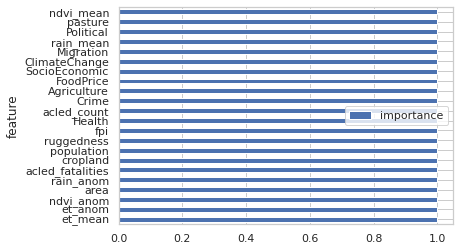

In [ ]:
import math
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22 = logreg_full.coef_[0]
feature_names = ['rain_mean',	'rain_anom',	'ndvi_mean',	'ndvi_anom',	'et_mean',	'et_anom',	'acled_count',	'acled_fatalities',
                 'fpi',	'area',	'cropland',	'population',	'ruggedness',	'pasture', 'Agriculture',	'ClimateChange',	'FoodPrice',
                 'SocioEconomic',	'Migration',	'Political',	'Health',	'Crime']

feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix_full = metrics.confusion_matrix(y_test, y_pred_full)
cnf_matrix_full

array([[24,  2],
       [ 9, 10]])

Text(0.5, 257.44, 'Predicted label')

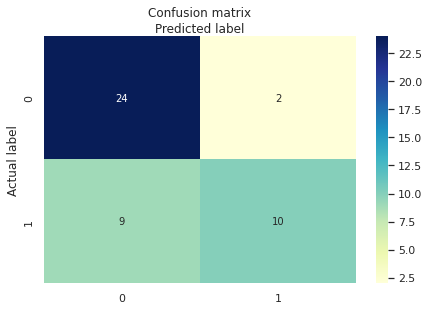

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_full), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_full))
print("Precision:",metrics.precision_score(y_test, y_pred_full))
print("Recall:",metrics.recall_score(y_test, y_pred_full))

Accuracy: 0.7555555555555555
Precision: 0.8333333333333334
Recall: 0.5263157894736842


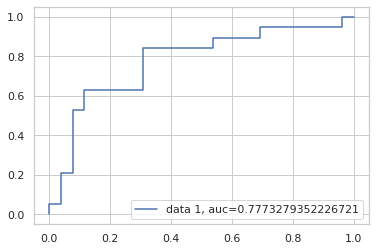

In [ ]:
y_pred_proba = logreg_full.predict_proba(X_test_full)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Adding Text features did not change model at all 🤔